In [6]:
import librosa
x, sr = librosa.load('Actor_01/03-01-05-02-01-01-01.wav')

In [7]:
print(x.shape)
print(sr)

(90496,)
22050


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

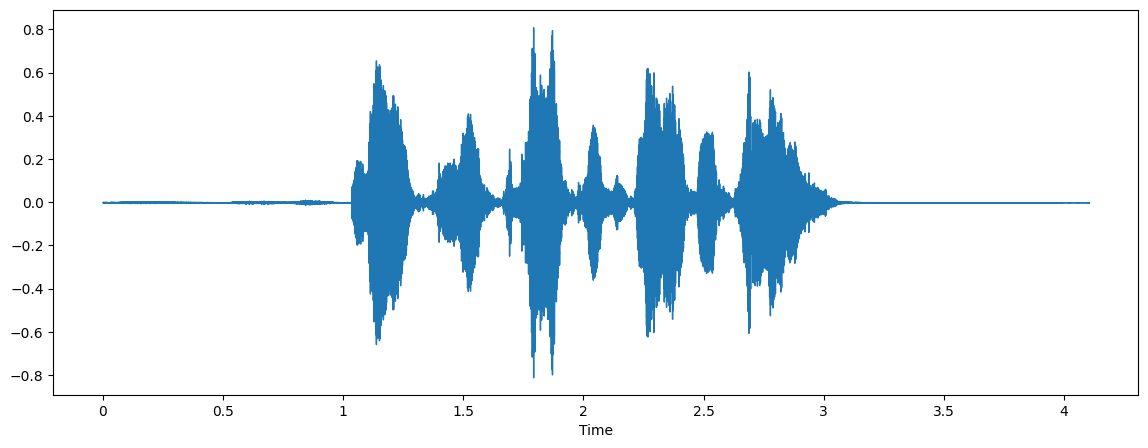

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

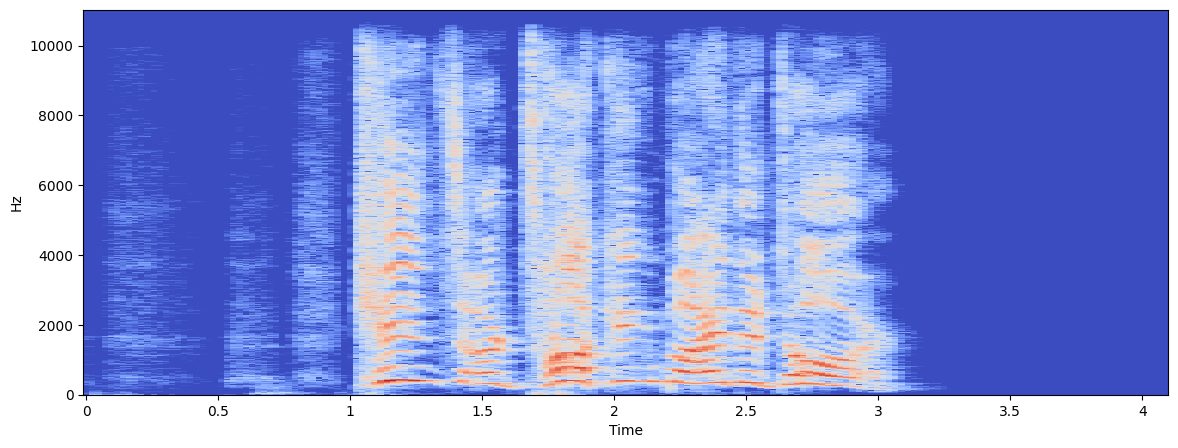

In [10]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [11]:
import IPython.display as ipd
ipd.Audio('Actor_01/03-01-05-02-01-01-01.wav') # load a local WAV file

In [12]:
import numpy
sr = 22050 # sample rate
T = 2.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*440*t)                # pure sine wave at 440 Hz

In [13]:
ipd.Audio(x, rate=sr) # load a NumPy array

In [1]:
import os
import time
import joblib
import librosa
import numpy as np

In [19]:
lst = []

for subdir, dirs, files in os.walk ('Actor_01/03-01-05-02-01-01-01.wav'):
    for file in files:
        try:
            X, sample_rate = librosa.load(os.path.join(subdir, file), 
                                                  res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate,
                                                 n_mfcc=40).T, axis = 0)
            file_class = int(file[7:8]) - 1
            arr = mfccs, file_class
            lst.append(arr)
        except ValueError as err:
            priint(err)
            continue

In [20]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1d
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

ImportError: cannot import name 'Conv1d' from 'tensorflow.keras.layers' (c:\users\seanr\appdata\local\programs\python\python37\lib\site-packages\keras\api\_v2\keras\layers\__init__.py)